In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from scipy.stats import pointbiserialr, spearmanr
path="/content/drive/MyDrive/Dataset/zomato.csv"
df=pd.read_csv(path)

In [4]:
df.columns


Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
df.drop(['url', 'book_table', 'phone','menu_item',
       'listed_in(type)' , 'listed_in(city)'], axis=1, inplace=True)

In [6]:
df.columns

Index(['address', 'name', 'online_order', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list'],
      dtype='object')

In [7]:
df.tail(30)

,address,name,online_order,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list
51687,"4th Floor, Uptown Square, Seegehalli, Near All...",Red Rhino,Yes,4.4 /5,1980,Whitefield,"Microbrewery, Pub","Beer, Margarita, Long Island Iced Tea, Cocktai...","Continental, Mediterranean, South Indian, Nort...","1,700","[('Rated 4.0', 'RATED\n Red Rhino is a Brewer..."
51688,"TR 9, 4th Floor, Plot 95, EPIP Zone, Near Vaid...",Ji Hazoor,Yes,4.0 /5,2856,Whitefield,"Casual Dining, Bar","Chicken Salad, Mocktails, Mutton Curry, Chicke...","Mughlai, North Indian, Biryani, Afghan","1,100","[('Rated 4.0', 'RATED\n Was there on last Wed..."
51689,"75, Inorbit Mall, EPIP Area, Road 7, Whitefiel...",HQ,No,4.1 /5,564,Whitefield,"Casual Dining, Bar","Mocktails, Pizza, Crispy Chicken, Beer, Nachos...","North Indian, Italian, Finger Food, Continental","1,000","[('Rated 3.0', ""RATED\n HQ is located at grou..."
51690,"223-1, ITPL Main Road, Sadarmangala, KR Puram ...",Biere Societee,No,4.2 /5,320,Whitefield,Pub,"Tempura Prawns, Cocktails, Noodles, Masala Pea...","Asian, Continental, European","1,500","[('Rated 3.0', 'RATED\n Went with Team on Thu..."
51691,"Shop FB-02, Upper Ground Floor, Prestige Shant...",Uno Chicago Bar & Grill,No,4.2 /5,156,Whitefield,"Bar, Casual Dining","Deep Dish Pizza, Mocktails, Burgers, Onion Rin...","American, Italian","1,800","[('Rated 4.0', ""RATED\n Had been here for lun..."
51692,"Third Floor, Ascendas Park Square, ITPL Main R...",Amoeba Sports Bar,Yes,3.9 /5,578,Whitefield,"Lounge, Bar","Pasta, Fish, Beer, Chicken Wings, Mocktails, G...","Continental, Chinese","1,000","[('Rated 3.0', 'RATED\n Amoeba is affordable ..."
51693,"87/2A & 87/3, SH 35, Seegehalli, Whitefield, B...",One For The Road,Yes,4.1 /5,137,Whitefield,Bar,"Cocktails, Pasta, Fish","Continental, North Indian, Finger Food","1,200","[('Rated 4.0', 'RATED\n Had been there on a S..."
51694,"29, Ground Floor, Phoenix Market City, Whitefi...",Whitefield Social,Yes,4.1 /5,2773,Whitefield,Pub,"Cocktails, Chicken Kebab, Murgh Ghee Roast, Vi...","American, North Indian, Chinese, Finger Food, ...","1,500","[('Rated 2.0', 'RATED\n Honestly speaking it ..."
51695,"The Waverly Hotels, Whitefield, Bangalore",The Whitefield Arms Pub & Microbrewery,Yes,4.2 /5,1113,Whitefield,"Pub, Microbrewery","Beer, Chicken Tikka, Cosmopolitan, Burgers, Co...","British, Continental, BBQ","1,600","[('Rated 4.0', ""RATED\n I never knew of this ..."
51696,"TF-01A, Level 3, VR Mall, Mahadevpura, Whitefi...",The Irish House,No,4.3 /5,1776,Whitefield,"Casual Dining, Pub","Beer, Cocktails, Burgers, Chicken Nachos, Mock...","European, American","1,700","[('Rated 4.0', 'RATED\n Nice place to grab a ..."


In [8]:
replace_dict = {'BTM': 'Jubilee Hills',
                'Koramangala 5th Block': 'Banjara Hills',
                'HSR': 'Hitech City',
                'Indiranagar': 'Sainikpuri',
                'JP Ngar': 'Himayat Nagar',
                'Jayanagar': 'Begumpet',
                'Whitefield': 'Pedamma Gudi',
                'Marathahalli': 'Panjagutta',
                'Bannerghatta Road': 'Secunderabad',
                'Koramangala 7th Block': 'Miyapur',
                'Banashankari':'Thumkunta'}
df['location'] = df['location'].replace(replace_dict)

In [9]:
df.tail(30)

,address,name,online_order,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list
51687,"4th Floor, Uptown Square, Seegehalli, Near All...",Red Rhino,Yes,4.4 /5,1980,Pedamma Gudi,"Microbrewery, Pub","Beer, Margarita, Long Island Iced Tea, Cocktai...","Continental, Mediterranean, South Indian, Nort...","1,700","[('Rated 4.0', 'RATED\n Red Rhino is a Brewer..."
51688,"TR 9, 4th Floor, Plot 95, EPIP Zone, Near Vaid...",Ji Hazoor,Yes,4.0 /5,2856,Pedamma Gudi,"Casual Dining, Bar","Chicken Salad, Mocktails, Mutton Curry, Chicke...","Mughlai, North Indian, Biryani, Afghan","1,100","[('Rated 4.0', 'RATED\n Was there on last Wed..."
51689,"75, Inorbit Mall, EPIP Area, Road 7, Whitefiel...",HQ,No,4.1 /5,564,Pedamma Gudi,"Casual Dining, Bar","Mocktails, Pizza, Crispy Chicken, Beer, Nachos...","North Indian, Italian, Finger Food, Continental","1,000","[('Rated 3.0', ""RATED\n HQ is located at grou..."
51690,"223-1, ITPL Main Road, Sadarmangala, KR Puram ...",Biere Societee,No,4.2 /5,320,Pedamma Gudi,Pub,"Tempura Prawns, Cocktails, Noodles, Masala Pea...","Asian, Continental, European","1,500","[('Rated 3.0', 'RATED\n Went with Team on Thu..."
51691,"Shop FB-02, Upper Ground Floor, Prestige Shant...",Uno Chicago Bar & Grill,No,4.2 /5,156,Pedamma Gudi,"Bar, Casual Dining","Deep Dish Pizza, Mocktails, Burgers, Onion Rin...","American, Italian","1,800","[('Rated 4.0', ""RATED\n Had been here for lun..."
51692,"Third Floor, Ascendas Park Square, ITPL Main R...",Amoeba Sports Bar,Yes,3.9 /5,578,Pedamma Gudi,"Lounge, Bar","Pasta, Fish, Beer, Chicken Wings, Mocktails, G...","Continental, Chinese","1,000","[('Rated 3.0', 'RATED\n Amoeba is affordable ..."
51693,"87/2A & 87/3, SH 35, Seegehalli, Whitefield, B...",One For The Road,Yes,4.1 /5,137,Pedamma Gudi,Bar,"Cocktails, Pasta, Fish","Continental, North Indian, Finger Food","1,200","[('Rated 4.0', 'RATED\n Had been there on a S..."
51694,"29, Ground Floor, Phoenix Market City, Whitefi...",Whitefield Social,Yes,4.1 /5,2773,Pedamma Gudi,Pub,"Cocktails, Chicken Kebab, Murgh Ghee Roast, Vi...","American, North Indian, Chinese, Finger Food, ...","1,500","[('Rated 2.0', 'RATED\n Honestly speaking it ..."
51695,"The Waverly Hotels, Whitefield, Bangalore",The Whitefield Arms Pub & Microbrewery,Yes,4.2 /5,1113,Pedamma Gudi,"Pub, Microbrewery","Beer, Chicken Tikka, Cosmopolitan, Burgers, Co...","British, Continental, BBQ","1,600","[('Rated 4.0', ""RATED\n I never knew of this ..."
51696,"TF-01A, Level 3, VR Mall, Mahadevpura, Whitefi...",The Irish House,No,4.3 /5,1776,Pedamma Gudi,"Casual Dining, Pub","Beer, Cocktails, Burgers, Chicken Nachos, Mock...","European, American","1,700","[('Rated 4.0', 'RATED\n Nice place to grab a ..."


In [10]:
df.replace(" ?", np.nan, inplace=True)

col_names = df.columns
num_data = df.shape[0]
for c in col_names:
    num_non = df[c].isna().sum()
    if num_non >0:
      print(c)
      print(num_non)
      print("{0:.2f}%".format(float(num_non) / num_data * 100))

rate
7775
15.03%
location
21
0.04%
rest_type
227
0.44%
dish_liked
28078
54.29%
cuisines
45
0.09%
approx_cost(for two people)
346
0.67%


In [11]:
df['dish_liked'].fillna('not available', inplace=True)

In [12]:
df.shape

(51717, 11)

In [13]:
df.replace(" ?", np.nan, inplace=True)

col_names = df.columns
num_data = df.shape[0]
for c in col_names:
    num_non = df[c].isna().sum()
    if num_non >0:
      print(c)
      print(num_non)
      print("{0:.2f}%".format(float(num_non) / num_data * 100))

rate
7775
15.03%
location
21
0.04%
rest_type
227
0.44%
cuisines
45
0.09%
approx_cost(for two people)
346
0.67%


In [14]:
df.dropna(how='any',inplace=True)
df.shape

(43533, 11)

In [15]:
df.replace(" ?", np.nan, inplace=True)

col_names = df.columns
num_data = df.shape[0]
for c in col_names:
    num_non = df[c].isna().sum()
    if num_non >0:
      print(c)
      print(num_non)
      print("{0:.2f}%".format(float(num_non) / num_data * 100))

Maximum: 6000
Minimum: 40


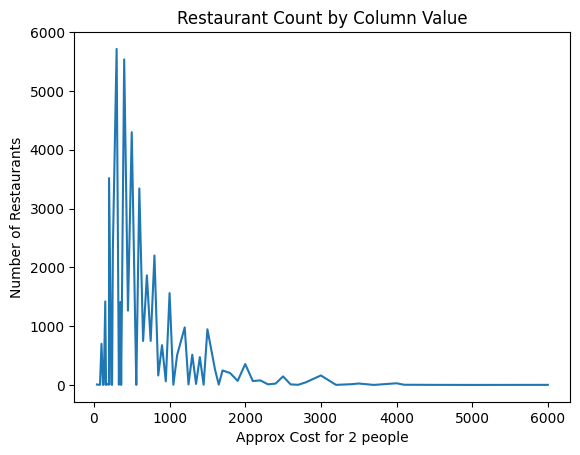

In [16]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '')
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(int)
import matplotlib.pyplot as plt
# Calculate the maximum and minimum values of the column
max_value = df['approx_cost(for two people)'].max()
min_value = df['approx_cost(for two people)'].min()

# Print the maximum and minimum values
print('Maximum:', max_value)
print('Minimum:', min_value)
value_counts = df['approx_cost(for two people)'].value_counts()

# Sort the values in ascending order
value_counts = value_counts.sort_index()

# Plot the graph
plt.plot(value_counts.index, value_counts.values)
plt.xlabel('Approx Cost for 2 people')
plt.ylabel('Number of Restaurants')
plt.title('Restaurant Count by Column Value')
plt.show()

In [17]:
ranges = [0, 500, 800, 1200, 1800, 2500, np.inf]
labels = ['Cheap', 'Reasonable', 'Affordable', 'Moderately Expensive', 'Expensive', 'Lavish']

# Replace the values in the column with the corresponding labels
df['approx_cost(for two people)'] = np.select(
    [df['approx_cost(for two people)'].between(ranges[i], ranges[i+1]) for i in range(len(ranges)-1)],
    labels,
    default='Unknown'
)

# Print the updated column

In [18]:
columns_to_split = ['rest_type', 'cuisines']
df[columns_to_split] = df[columns_to_split].astype(str)
# Split the values in the specified columns
for column in columns_to_split:
    df[column] = df[column].str.split(',')

# Print the updated DataFrame
columns_to_split.append('approx_cost(for two people)')
columns_to_split.append('location')

In [19]:
df['cuisines'] = df['cuisines'].astype(str)

# Remove leading and trailing spaces from each cuisine within the cuisines column
df['cuisines'] = df['cuisines'].apply(lambda x: [cuisine.strip() for cuisine in x.split(',')]).str.join(',')

df['rest_type'] = df['rest_type'].astype(str)

# Remove leading and trailing spaces from each cuisine within the cuisines column
df['rest_type'] = df['rest_type'].apply(lambda x: [cuisine.strip() for cuisine in x.split(',')]).str.join(',')

In [20]:
df.drop_duplicates(subset=['address', 'name'], keep='first', inplace=True)
df.shape

(10154, 11)

In [22]:
from tabulate import tabulate
category_counts = {}
max_length = 0
threshold = 700

# Calculate the counts for each category and find the maximum length
for column in columns_to_split:
    counts = df[column].explode().str.strip().value_counts()
    category_counts[column] = counts
    if len(counts) > max_length:
        max_length = len(counts)

table_data = []
headers = []
max_length=29
# Iterate over each category and construct the table data
for category, counts in category_counts.items():
    values = counts.index.tolist()
    count_values = counts.values.tolist()

    # Check if the attribute is the one you want to limit the unique values
    if category == 'cuisines (Count)':
        # Check if the unique count exceeds the threshold
        if len(values) > threshold:
            values = values[:threshold]
            count_values = count_values[:threshold]

    values.extend([''] * (max_length - len(values)))
    count_values.extend([''] * (max_length - len(count_values)))
    headers.append(f'{category}')
    headers.append(f'{category} Count')
    table_data.append(values)
    table_data.append(count_values)

transposed_table_data = list(map(list, zip(*table_data)))

table = tabulate(transposed_table_data, headers=headers, tablefmt='fancy_grid')
print(table)

╒═════════════════════════════════════╤═══════════════════╤════════════════════════════════════════════════════════════╤══════════════════╤═══════════════════════════════╤═════════════════════════════════════╤═══════════════════════╤══════════════════╕
│ rest_type                           │   rest_type Count │ cuisines                                                   │   cuisines Count │ approx_cost(for two people)   │ approx_cost(for two people) Count   │ location              │   location Count │
╞═════════════════════════════════════╪═══════════════════╪════════════════════════════════════════════════════════════╪══════════════════╪═══════════════════════════════╪═════════════════════════════════════╪═══════════════════════╪══════════════════╡
│ ['Quick Bites']                     │              3900 │ ['North Indian']                                           │              542 │ Cheap                         │ 6941                                │ Pedamma Gudi          │        

In [23]:
# Define user inputs
input_rest_type = ['Quick Bites']
input_cuisines = ['North Indian', 'Chinese']
input_cost = 'Cheap'
input_location = 'Pedamma Gudi'

In [25]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.7 MB/s eta 0:00:00


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import category_encoders as ce
filtered_df = df[
    df['rest_type'].apply(lambda x: all(item in x for item in input_rest_type)) &
    df['cuisines'].apply(lambda x: all(item in x for item in input_cuisines)) &
    (df['approx_cost(for two people)'] == input_cost) &
    (df['location'] == input_location)
]

if len(filtered_df) >= 10:
    recommendations = filtered_df.sample(10)
else:
    # Convert list columns to string
    df['rest_type'] = df['rest_type'].apply(lambda x: ' '.join(x))
    df['cuisines'] = df['cuisines'].apply(lambda x: ' '.join(x))

    # Perform frequency encoding for rest_type and cuisines
    rest_type_counts = df['rest_type'].value_counts()
    cuisines_counts = df['cuisines'].value_counts()

    df['rest_type_encoded'] = df['rest_type'].map(rest_type_counts)
    df['cuisines_encoded'] = df['cuisines'].map(cuisines_counts)

    df['combined_attributes'] = df['rest_type'] + ' ' + df['cuisines'] + ' ' + df['location'].astype(str) + ' ' + df['approx_cost(for two people)'].astype(str)

    # Create feature vectors using TF-IDF vectorization
    vectorizer = TfidfVectorizer()
    feature_matrix = vectorizer.fit_transform(df['combined_attributes'])

    # Convert user inputs to a feature vector
    user_input = [' '.join(input_rest_type), ' '.join(input_cuisines), input_cost, input_location]
    user_input_vector = vectorizer.transform(user_input)

    # Compute cosine similarity between user input and feature matrix
    similarity_scores = cosine_similarity(user_input_vector, feature_matrix)

    # Get indices of top recommendations based on similarity scores
    top_indices = similarity_scores.argsort()[0][::-1]

    # Select additional recommendations from the DataFrame
    additional_recommendations = df.iloc[top_indices[:10 - len(filtered_df)]]  # Select remaining recommendations

    # Concatenate recommendations from both approaches
    recommendations = pd.concat([filtered_df, additional_recommendations], ignore_index=True)

Suggested Restaurants:


,address,name,online_order,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people)
7403,"G18, Arcade Brigade Metropolis, Whitefield, Bangalore",The IT Crowd,Yes,2.8/5,20,Pedamma Gudi,['Quick Bites'],not available,"['North Indian',' Burger',' Sandwich',' Chinese']",Cheap
6826,"140, Pattandur Agarahara, Whitefield, Bangalore",Roti Ghar Ki,Yes,4.0/5,107,Pedamma Gudi,['Quick Bites'],"Chole, Paratha, Rajma","['North Indian',' Chinese',' Biryani']",Cheap
50685,"Prashanti Complex, Chanasandra Main Road Whitefield, Bangalore",On The Go,Yes,NEW,0,Pedamma Gudi,['Quick Bites'],not available,"['North Indian',' Mughlai',' Chinese']",Cheap
50716,"Beta Block Food Court, Sigma Soft Tech Park Ramagondanahalli, Whitefield, Bangalore",Hangout Junction,No,3.6 /5,28,Pedamma Gudi,['Quick Bites'],not available,"['North Indian',' Chinese',' South Indian']",Cheap
51556,"Shop WH 13, Prashanthi Complex, Channasandra Main Road, Chansandra, Whitefield, Bangalore",Hungry Wok,No,3.3 /5,5,Pedamma Gudi,['Quick Bites'],not available,"['Chinese',' North Indian']",Cheap
6912,"Thimma Reddy Industrial Area, Main Road, Mahadevapura Post, Whitefield, Bangalore",Kitchen Rabbit,Yes,3.6/5,18,Pedamma Gudi,['Quick Bites'],not available,"['North Indian',' Chinese',' Andhra']",Cheap
7334,"Near Hoodi Circle, Opposite Meghna Nursing Home, Whitefield, Bangalore",Basmati Restaurant,Yes,3.1/5,20,Pedamma Gudi,['Quick Bites'],not available,"['North Indian',' South Indian',' Chinese',' Biryani']",Cheap
50709,"Dr. Meera Complex, Near Reliance Fresh, Whitefield, Bangalore",Siddharth Restaurant,No,3.6 /5,33,Pedamma Gudi,['Quick Bites'],"Thali, Biryani","['North Indian',' Chinese']",Cheap
50177,"6, ITPB Main Road, Devasandra Industrial Estate, Mahadevapura, Whitefield, Bangalore",Sri Udupi Park,Yes,3.8 /5,16,Pedamma Gudi,['Quick Bites'],not available,"['South Indian',' North Indian',' Chinese',' Beverages']",Cheap
7317,"8/10, 301 Siddapura Village, Vartur Main Road Near Shell Petrol Bunk, Whitefield, Bangalore",Tasty Food,Yes,NEW,0,Pedamma Gudi,['Quick Bites'],not available,"['North Indian',' Chinese']",Cheap


In [28]:
# Set the desired column order
column_order = ['name', 'address','online_order'	,'rate'	,'votes' ,'location','rest_type','dish_liked','cuisines', 'approx_cost(for two people)']

# Print the suggested restaurants without row numbers
if len(recommendations) > 0:
    print("Suggested Restaurants:")
    recommendations.drop('reviews_list', inplace=True, axis=1)
    with pd.option_context('display.max_colwidth', None):
        print(tabulate(recommendations[column_order], headers='keys', tablefmt='fancy_grid', showindex=False))
else:
    print("No matching restaurants found.")


Suggested Restaurants:
╒══════════════════════╤═════════════════════════════════════════════════════════════════════════════════════════════╤════════════════╤════════╤═════════╤══════════════╤═════════════════╤═══════════════════════╤══════════════════════════════════════════════════════════╤═══════════════════════════════╕
│ name                 │ address                                                                                     │ online_order   │ rate   │   votes │ location     │ rest_type       │ dish_liked            │ cuisines                                                 │ approx_cost(for two people)   │
╞══════════════════════╪═════════════════════════════════════════════════════════════════════════════════════════════╪════════════════╪════════╪═════════╪══════════════╪═════════════════╪═══════════════════════╪══════════════════════════════════════════════════════════╪═══════════════════════════════╡
│ The IT Crowd         │ G18, Arcade Brigade Metropolis, Whitefield,